In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df['quality'].value_counts().sort_index()


quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

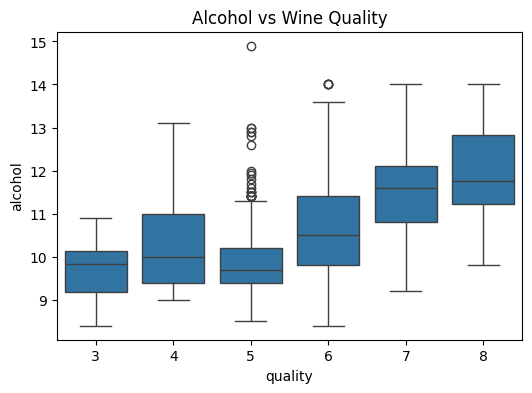

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol vs Wine Quality")
plt.show()


In [6]:
df['quality_label'] = (df['quality'] >= 7)
df['quality_label'].value_counts()


quality_label
False    984
True     159
Name: count, dtype: int64

In [7]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape


((914, 12), (229, 12))

In [9]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

print(x_train_scaled.shape, y_train.shape)
print(x_test_scaled.shape, y_test.shape)


(914, 12) (914,)
(229, 12) (229,)


In [10]:
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train_scaled, y_train)

y_pred_sgd = sgd.predict(x_test_scaled)

print("SGD Accuracy:", accuracy_score(y_test, y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))


SGD Accuracy: 0.8864628820960698
[[187  10]
 [ 16  16]]
              precision    recall  f1-score   support

       False       0.92      0.95      0.94       197
        True       0.62      0.50      0.55        32

    accuracy                           0.89       229
   macro avg       0.77      0.72      0.74       229
weighted avg       0.88      0.89      0.88       229



In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9170305676855895
[[191   6]
 [ 13  19]]
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       197
        True       0.76      0.59      0.67        32

    accuracy                           0.92       229
   macro avg       0.85      0.78      0.81       229
weighted avg       0.91      0.92      0.91       229



In [12]:
svc = SVC()
svc.fit(x_train_scaled, y_train)

y_pred_svc = svc.predict(x_test_scaled)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


SVC Accuracy: 0.8995633187772926
[[193   4]
 [ 19  13]]
              precision    recall  f1-score   support

       False       0.91      0.98      0.94       197
        True       0.76      0.41      0.53        32

    accuracy                           0.90       229
   macro avg       0.84      0.69      0.74       229
weighted avg       0.89      0.90      0.89       229



In [13]:
results = pd.DataFrame({
    "Model": ["SGD Classifier", "Random Forest", "SVC"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_sgd),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svc)
    ]
})

results


,Model,Accuracy
0,SGD Classifier,0.886463
1,Random Forest,0.917031
2,SVC,0.899563
